In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
def parser(x):
	return pd.datetime.strptime('000'+x, '%Y-%m')

In [4]:
series = pd.read_excel('./data/sales-of-shampoo-over-a-three-ye.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [5]:
print(series.shape)
print(series.head())
print(series.tail())
dates = pd.date_range('1901-01', periods=36, freq='M')
series.index = dates

(36,)
Month
0001-01    266.0
0001-02    145.9
0001-03    183.1
0001-04    119.3
0001-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64
Month
0003-08    407.6
0003-09    682.0
0003-10    475.3
0003-11    581.3
0003-12    646.9
Name: Sales of shampoo over a three year period, dtype: float64


1901-01-31    266.0
1901-02-28    145.9
1901-03-31    183.1
1901-04-30    119.3
1901-05-31    180.3
Freq: M, Name: Sales of shampoo over a three year period, dtype: float64


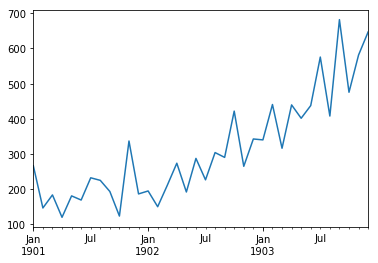

In [6]:
print(series.head())
series.plot()
pyplot.show()

/Users/kzht165/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


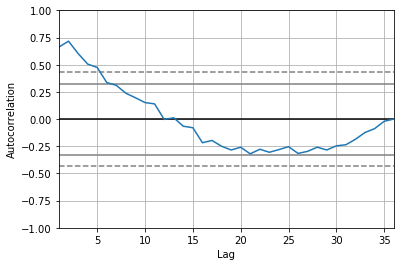

In [7]:
autocorrelation_plot(series)
pyplot.show()

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 18 Jan 2018   AIC                            406.340
Time:                                                 15:47:23   BIC                            417.227
Sample:                                             02-28-1901   HQIC                           410.098
                                                  - 12-31-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

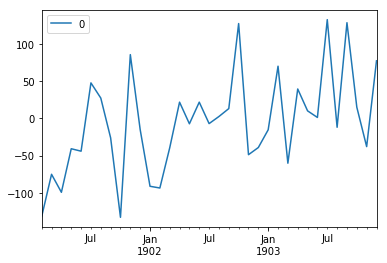

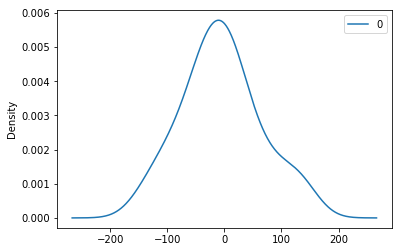

                0
count   35.000000
mean    -5.495234
std     68.132881
min   -133.296613
25%    -42.477967
50%     -7.186668
75%     24.748316
max    133.237956


In [8]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117688, expected=342.300000
predicted=306.512938, expected=339.700000
predicted=387.376402, expected=440.400000
predicted=348.154152, expected=315.900000
predicted=386.308838, expected=439.300000
predicted=356.082001, expected=401.300000
predicted=446.379518, expected=437.400000
predicted=394.737272, expected=575.500000
predicted=434.915447, expected=407.600000
predicted=507.923421, expected=682.000000
predicted=435.482775, expected=475.300000
predicted=652.743812, expected=581.300000
predicted=546.343528, expected=646.900000
Test MSE: 6958.326


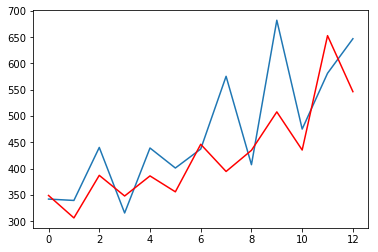

In [11]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()